In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [8, 6]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import xray_emissivity

In [8]:
# eROSITA repsonse files from https://wiki.mpe.mpg.de/eRosita/erocalib_calibration
rmffile = './responses/rmf01_sdtq.fits'
arffile = './responses/arf01_200nmAl_sdtq.fits'
#xray = xray_emissivity.XrayEmissivity(energy_range=[0.01,12.0], num_ebins=101, rmf=rmffile, arf=arffile, 
#                                        use_energy_unit=True)
xray = xray_emissivity.XrayEmissivity(energy_range=[0.01,12.0], num_ebins=101, rmf=None, arf=None, 
                                      use_energy_unit=True )
xray_cnts = xray_emissivity.XrayEmissivity(energy_range=[0.01,12.0], num_ebins=101, rmf=None, arf=None, 
                                      use_energy_unit=False )

In [9]:
xray.tabulate_xray_emissivity(temperature_range=[0.000862, 30.0], metallicity_range=[0.001, 10.0], 
                              num_tbins=101, num_zbins=21, nH=2.0 )
xray.save_emissivity_table("./data/etable_001_12keV")

xray_cnts.tabulate_xray_emissivity(temperature_range=[0.000862, 30.0], metallicity_range=[0.001, 10.0], 
                              num_tbins=101, num_zbins=21, nH=2.0 )
xray_cnts.save_emissivity_table("./data/etable_001_12keV_cnts")


  0%|          | 0/101 [00:00<?, ?it/s]

Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Computing X-ray spectrum without instrumental response


100%|██████████| 101/101 [05:04<00:00,  3.02s/it]


Saving emissivity table as ./data/etable_001_12keV.hdf5


  0%|          | 0/101 [00:00<?, ?it/s]

Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Computing X-ray spectrum without instrumental response


100%|██████████| 101/101 [04:38<00:00,  2.76s/it]

Saving emissivity table as ./data/etable_001_12keV_cnts.hdf5


In [15]:
xray_soft = xray_emissivity.XrayEmissivity(energy_range=[0.01,0.5], num_ebins=101, rmf=None, arf=None, 
                                      use_energy_unit=True )
xray_soft_cnts = xray_emissivity.XrayEmissivity(energy_range=[0.01,0.5], num_ebins=101, rmf=None, arf=None, 
                                      use_energy_unit=False )

xray_soft.tabulate_xray_emissivity(temperature_range=[0.000862, 30.0], metallicity_range=[0.001, 10.0], 
                              num_tbins=101, num_zbins=21, nH=2.0 )

xray_soft_cnts.tabulate_xray_emissivity(temperature_range=[0.000862, 30.0], metallicity_range=[0.001, 10.0], 
                              num_tbins=101, num_zbins=21, nH=2.0 )


  0%|          | 0/101 [00:00<?, ?it/s]

Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Computing X-ray spectrum without instrumental response


  0%|          | 0/101 [00:00<?, ?it/s]

Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Computing X-ray spectrum without instrumental response


100%|██████████| 101/101 [04:32<00:00,  2.69s/it]


In [16]:
xray_soft.save_emissivity_table("./data/etable_001_05keV")
xray_soft_cnts.save_emissivity_table("./data/etable_001_05keV_cnts")

Saving emissivity table as ./data/etable_001_05keV.hdf5
Saving emissivity table as ./data/etable_001_05keV_cnts.hdf5


In [11]:
xray.tabulate_xray_emissivity(temperature_range=[0.000862, 30.0], metallicity_range=[0.001, 10.0], 
                              num_tbins=101, num_zbins=21, nH=2.0 )
xray.save_emissivity_table("./data/etable_05_2keV")
#xray.save_emissivity_table("./data/etable")

  0%|          | 0/101 [00:00<?, ?it/s]

Will not thermally broaden lines
Will thermally broaden lines with emissivity > 1.000000e-18 ph cm3 s-1
Computing X-ray spectrum without instrumental response


  0%|          | 0/101 [00:04<?, ?it/s]


KeyboardInterrupt: 

In [18]:
# Read table from file
xray_soft.read_emissivity_table('./data/etable_001_05keV.hdf5')
print (xray_soft.emin, xray_soft.emax)

0.01 0.5


In [22]:
kT = np.array([0.01,0.1, 1.0, 10.0])
metal = np.array([1.0,1.0,1.0, 1.0])
emiss = xray_soft.return_interpolated_emissivity(kT, metal)
print (emiss)

[2.54930271e-29 7.40592523e-24 2.39808314e-24 1.21228357e-24]


<ipython-input-23-4444fdb0e846>:11: RuntimeWarning: divide by zero encountered in log10
  c = ax.imshow(np.log10(xray_soft.etable.T), origin="lower", extent=extent, aspect='auto')


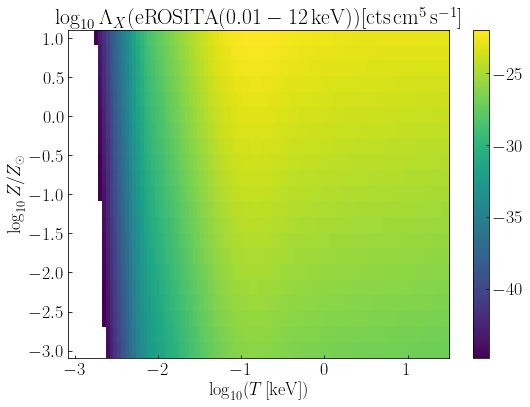

In [23]:
# Plot showing the emissivity table

ltbins = np.log10(xray_soft.tbins)
lzbins = np.log10(xray_soft.zbins)
dx = (ltbins[1]-ltbins[0])/2.
dy = (lzbins[1]-lzbins[0])/2.
extent = [ltbins[0]-dx, ltbins[-1]+dx, lzbins[0]-dy, lzbins[-1]+dy]

fig, ax= plt.subplots()

c = ax.imshow(np.log10(xray_soft.etable.T), origin="lower", extent=extent, aspect='auto')
plt.colorbar(c)

ax.set_xlabel(r'$\log_{10}(T\,[{\rm keV}])$')
ax.set_ylabel(r'$\log_{10}Z/Z_\odot$')
#ax.set_title(r'$\log_{10}\Lambda_{X}(0.01-12\,{\rm keV})[{\rm erg\,s^{-1}cm^3}]$')
ax.set_title(r'$\log_{10}\Lambda_{X}({\rm eROSITA}(0.01-12\,{\rm keV}))[{\rm cts\,cm^5\,s^{-1}}]$')


plt.tight_layout()
plt.show()

In [4]:
#r (kpc)  M_DM (<r) (M_sun) n_H (cm^-3)  T (K)  P_th/k_B (K cm^-3) P_tot/k_B (K cm^-3) Mgas(<r) (Msun) E_th(<r) (erg)  E_nth(<r) (erg)  E_turb(<r) (erg)

r, mDM, nH, T, Pth, Ptot, Mgas, Eth, Enth, Eturb = np.loadtxt("model_911_main_prop.txt",unpack=True) 

In [25]:
K_to_keV = 8.61733e-08 
kb = 1.36e-16
mue = 1.14
mu = 0.59

pe_factor = mu / mue

ngas = nH / mu
temperature = T *  K_to_keV
pressure = Pth * K_to_keV * pe_factor
metallicity = 0.3

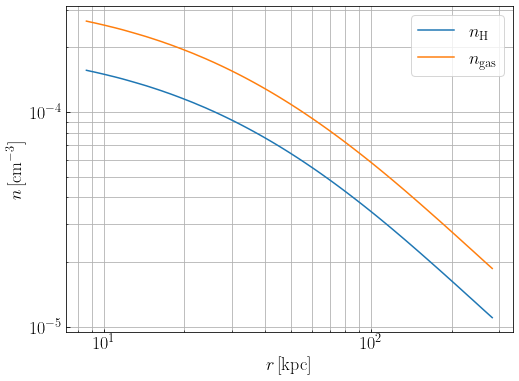

In [26]:
plt.loglog(r,nH, label=r'$n_{\rm H}$')
plt.loglog(r,ngas, label=r'$n_{\rm gas}$')
plt.xlabel(r'$r\,[{\rm kpc}]$')
plt.ylabel(r'$n\,[{\rm cm^{-3}}]$')
plt.grid(which='both')
plt.legend()

In [42]:
import cgm_profiles

In [43]:
mass = 1e12
redshift = 0.01
halo_pro = cgm_profiles.HaloProfile(mass, redshift, r, pressure, ngas, metallicity, temperature=temperature)

In [44]:
proj_ne = halo_pro.projected_electron_density_profile(r)

(1e+18, 1e+20)

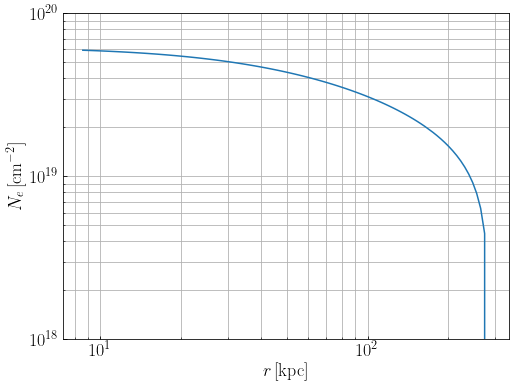

In [45]:
plt.loglog(r,proj_ne)
plt.grid(which='both')
plt.xlabel(r'$r\,[{\rm kpc}]$')
plt.ylabel(r'$N_e\,[{\rm cm^{-2}}]$')
plt.ylim(1e18, 1e20)

In [46]:
proj_y = halo_pro.projected_y_profile(r)

(1e-10, 1e-08)

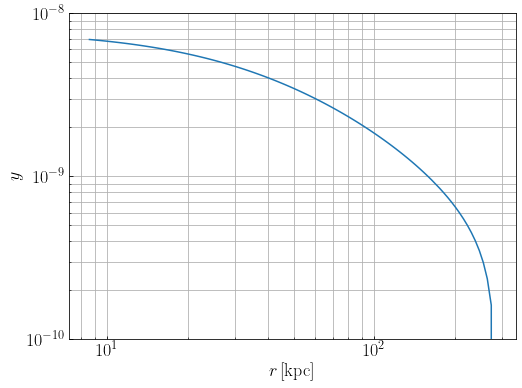

In [47]:
plt.loglog(r,proj_y)
plt.grid(which='both')
plt.xlabel(r'$r\,[{\rm kpc}]$')
plt.ylabel(r'$y$')
plt.ylim(1e-10, 1e-8)